In [1]:
%load_ext autoreload

In [2]:
from tdlearning.experiments.experiments import *
from tdlearning.utils.utils import *
from tdlearning.envs.env_wrappers import *
import os 
from tdlearning.agents.SRAgent import TDSR_WM
from tdlearning.plot.utils import *


### Generalization experiments


In [3]:
path = os.path.join('data','tdlearning')
plot_path = os.path.join('plots','tdlearning')
env_list=['empty','four_rooms','t_maze','circle','detour','obstacle']


In [4]:
n_repetitions = 120
num_steps = 120
num_episodes = 200
lr = 1e-1
gamma = 0.7


env_list=['empty','four_rooms','t_maze','circle','detour','obstacle']

for env_name in env_list:
    steps_asym = []
    steps_sym = []


    
    
    env = create_grid_env(env_name)
    
    


    for i in range(n_repetitions):
        


        asym_agent = TDSR_WM(env.state_size, env.action_space.n, lr=lr, forward_weight=1.0,
                                                    backward_weight=0.0, gamma=gamma, poltype='softmax',
                                                  )
        sym_agent =  TDSR_WM(env.state_size, env.action_space.n, lr=lr, forward_weight=0.5,
                                                   backward_weight=0.5, gamma=gamma, poltype='softmax',
                                                   )
        
        steps_asym.append(run_single_agent_generalization_experiment(env,asym_agent,num_steps=num_steps,num_episodes=num_episodes))

        
        steps_sym.append(run_single_agent_generalization_experiment(env,sym_agent,num_steps=num_steps,num_episodes=num_episodes))
        
        
    steps_sym = np.array(steps_sym)
    steps_asym = np.array(steps_asym)
    
    suffices = [env_name]
    save_generalization_data((steps_sym,steps_asym),agents = ['symmetric','asymmetric'],path = path,suffices = suffices )


KeyboardInterrupt: 

In [19]:
env_list=['empty','four_rooms','t_maze','circle','detour','obstacle']


6.0


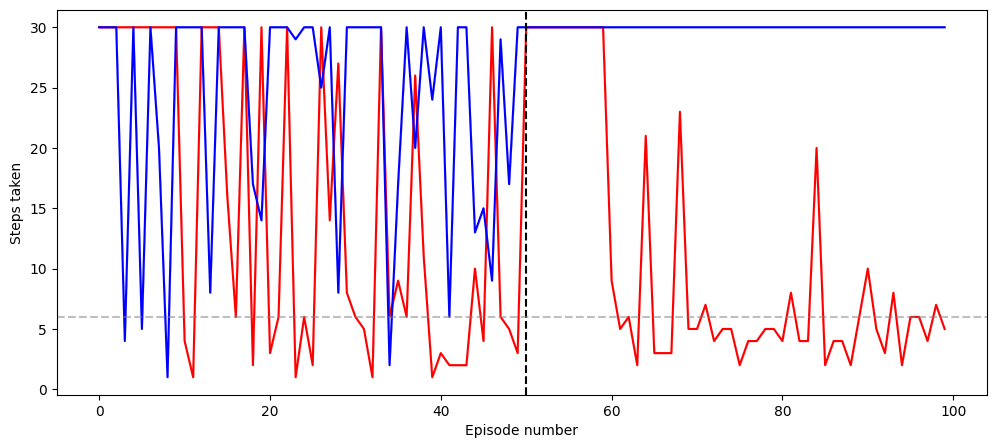

6.676031606672519


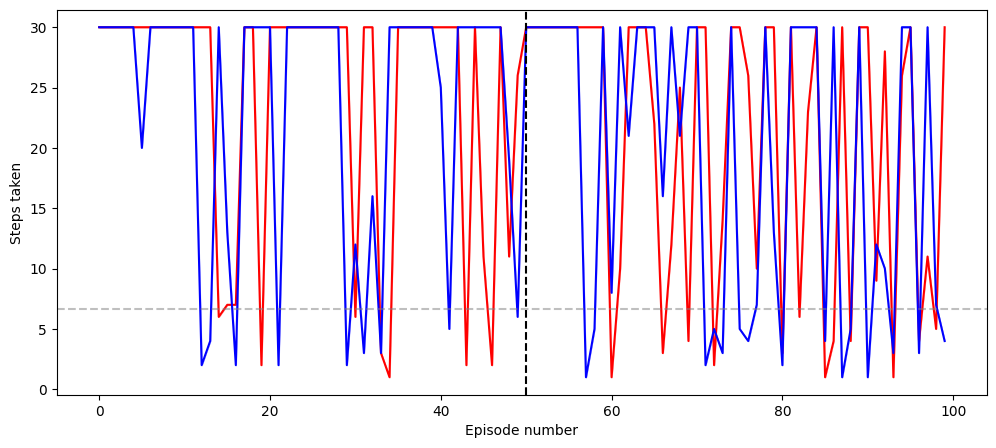

5.218181818181818


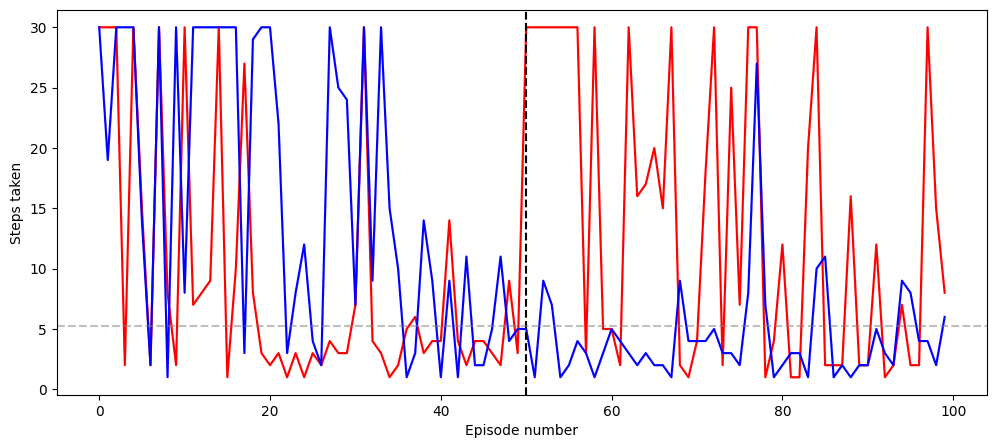

5.779904306220096


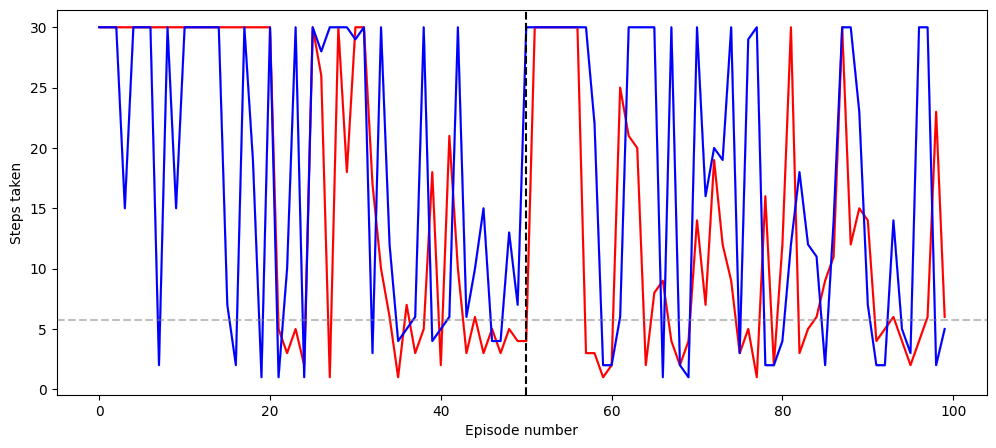

7.77327935222672


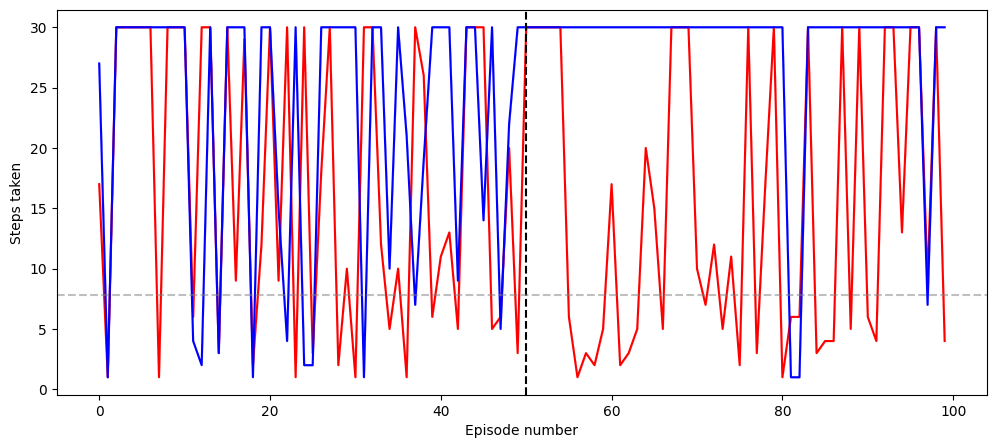

7.1877082562014065


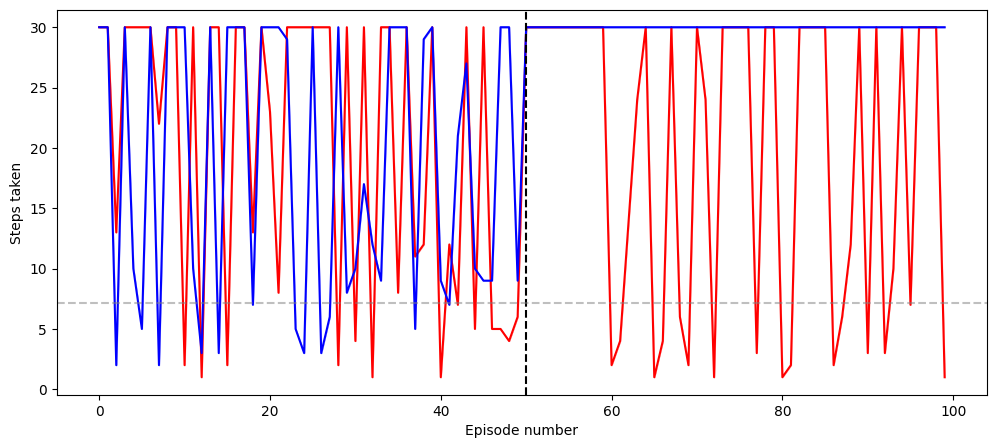

In [5]:
plot_path = os.path.join('plots','tdlearning')
if not os.path.exists(plot_path):
    os.makedirs(plot_path)
for env_name in env_list:
    suffices = [env_name]
    env = create_grid_env(env_name)

    lower_bound = env.G.mean_distance()
    
    steps_sym,steps_asym = load_generalization_data(path,suffices=suffices)
    
    save_path = os.path.join(plot_path,'generalization_{}.png'.format(env_name))
    fig,ax = create_generalization_plot(steps_sym,steps_asym,save_path = save_path,lower_bound=lower_bound)
    
    plt.show()

### Fixed performance instead of fixed number of episodes

In [9]:
n_repetitions = 120
num_steps = 120
lr = 1e-1
gamma = 0.7


env_list=['empty','four_rooms','t_maze','circle','detour','obstacle']

for env_name in env_list:
    steps_asym = []
    steps_sym = []


    
    
    env = create_grid_env(env_name)
    
    


    for i in range(n_repetitions):
        


        asym_agent = TDSR_WM(env.state_size, env.action_space.n, lr=lr, forward_weight=1.0,
                                                    backward_weight=0.0, gamma=gamma, poltype='softmax',
                                                    )
        sym_agent =  TDSR_WM(env.state_size, env.action_space.n, lr=lr, forward_weight=0.5,
                                                   backward_weight=0.5, gamma=gamma, poltype='softmax',
                                                   )
        
        steps_asym.append(run_single_agent_generalization_experiment_with_performance_criterion(env,asym_agent,num_steps=num_steps))

        
        steps_sym.append(run_single_agent_generalization_experiment_with_performance_criterion(env,sym_agent,num_steps=num_steps))
        
        
    steps_sym = np.array(steps_sym)
    steps_asym = np.array(steps_asym)
    
    suffices = [env_name,'p_crit']
    save_generalization_data((steps_sym,steps_asym),agents = ['symmetric','asymmetric'],path = path,suffices = suffices )


file at data/tdlearning/gen_steps_symmetric_empty_p_crit.npy already exists, set overwrite=True if you want to create data anyway
file at data/tdlearning/gen_steps_asymmetric_empty_p_crit.npy already exists, set overwrite=True if you want to create data anyway
saved data at data/tdlearning/gen_steps_symmetric_four_rooms_p_crit.npy
saved data at data/tdlearning/gen_steps_asymmetric_four_rooms_p_crit.npy
saved data at data/tdlearning/gen_steps_symmetric_t_maze_p_crit.npy
saved data at data/tdlearning/gen_steps_asymmetric_t_maze_p_crit.npy


KeyboardInterrupt: 

/Users/jkeckadmin/Desktop/projects/sympredlearning/tdlearning/plot/utils.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violins = sns.violinplot(df, x = 'Agent',y='Deviation from Minimal Path Length',palette=colors,scale='width',alpha=0.5,cut = 0.0)
/Users/jkeckadmin/Desktop/projects/sympredlearning/tdlearning/plot/utils.py:81: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  violins = sns.violinplot(df, x = 'Agent',y='Deviation from Minimal Path Length',palette=colors,scale='width',alpha=0.5,cut = 0.0)


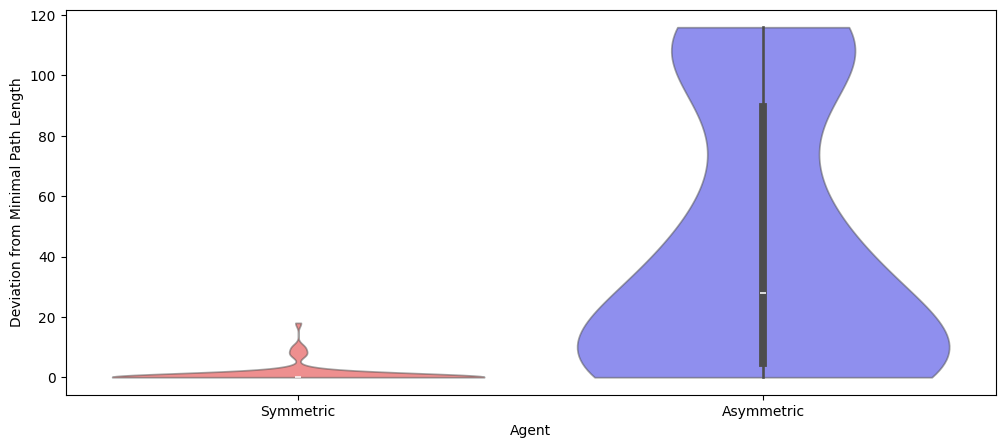

FileNotFoundError: [Errno 2] No such file or directory: 'data/tdlearning/gen_steps_symmetric_four_rooms_p_crit.npy'

In [8]:
for env_name in env_list:
    suffices = [env_name,'p_crit']
   
    steps_sym,steps_asym = load_generalization_data(path,suffices=suffices)
    
    save_path = os.path.join(plot_path,'generalization_p_crit_{}.png'.format(env_name))
    fig,ax = create_violin_plot(steps_sym.mean(axis=0),steps_asym.mean(axis=0),save_path = save_path)
    
    plt.show()

### Mean over different environments

In [4]:
env_list=['empty','four_rooms','t_maze','circle','detour','obstacle']


(100,)
(100,)
(100,)
(100,)


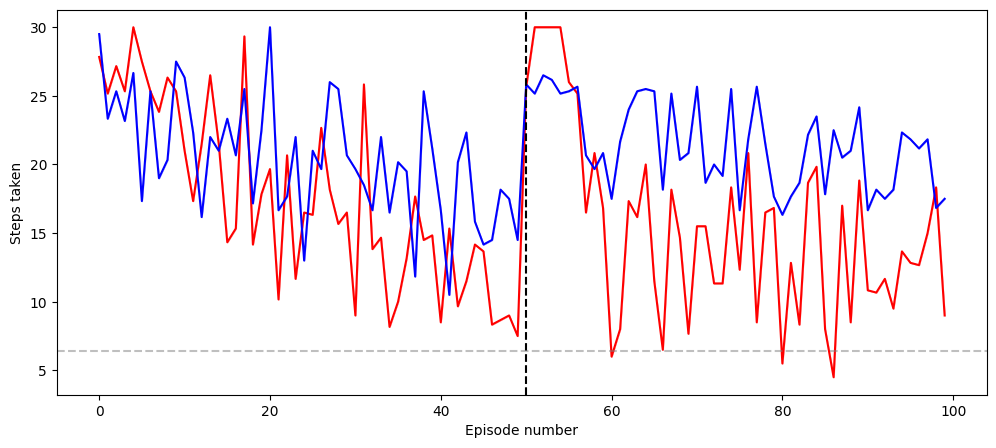

In [8]:
sym = []
sd_sym=[]
asym = []
sd_asym=[]
lbounds = []
for env_name in env_list:
    
    env = create_grid_env(env_name)

    suffices = [env_name]
    
    lower_bound = env.G.mean_distance()
    
    steps_sym,steps_asym = load_generalization_data(path,suffices=suffices)
    
    sym.append(steps_sym.mean(axis=0))
    sd_sym.append(steps_sym.std(axis=0))
    asym.append(steps_asym.mean(axis=0))
    sd_asym.append(steps_asym.std(axis=0))
    lbounds.append(lower_bound)

sym = np.array(sym)
asym = np.array(asym)
lower_bound = np.mean(lbounds)
#mean std over environments
std_sym  = np.mean(sd_sym,axis=0).flatten()
std_asym  = np.mean(sd_asym,axis=0).flatten()
save_path = os.path.join(plot_path,'generalization_mean_over_environments.png')

fig,ax = create_generalization_plot(sym,asym,stds=(std_sym,std_asym), save_path = save_path,lower_bound=lower_bound)


In [ ]:
sym = []
asym = []
for env_name in env_list:
    

    suffices = [env_name,'p_crit']
    
    
    steps_sym,steps_asym = load_generalization_data(path,suffices=suffices)
    
    sym.append(steps_sym.mean(axis=(0,1)))
    asym.append(steps_asym.mean(axis=(0,1)))

sym = np.array(sym)
asym = np.array(asym)

save_path = os.path.join(plot_path,'generalization_p_crit_mean_over_environments.png')

fig,ax = create_violin_plot(sym,asym,save_path = save_path)


In [ ]:

env_list = ['empty']
lrs = [1e-3,1e-2,1e-1,1]

gammas = [0.2,0.4,0.6,0.8]



for lr in lrs:
    for gamma in gammas:
        


        for env_name in env_list:


            env = create_grid_env(env_name)


            for rep in n_repetitions:




                asym_agent = TDSR_WM(env.state_size, env.action_space.n, lr=lr, forward_weight=1.0,
                                                            backward_weight=0.0, gamma=gamma, poltype='softmax',
                                                            )
                sym_agent =  TDSR_WM(env.state_size, env.action_space.n, lr=lr, forward_weight=0.5,
                                                           backward_weight=0.5, gamma=gamma, poltype='softmax',
                                                           )

                steps_asym.append(run_single_agent_generalization_experiment_with_performance_criterion(env,asym_agent))


                steps_sym.append(run_single_agent_generalization_experiment_with_performance_criterion(env,sym_agent))


    steps_sym = np.array(steps_sym)
    steps_asym = np.array(steps_asym)
    
    suffices = [env_name,'p_crit','lr',str(lr*1000),'gamma',str(gamma*10)]
    save_generalization_data((steps_sym,steps_asym),agents = ['symmetric','asymmetric'],path = path,suffices = suffices )



In [ ]:
env_list = ['empty']


for lr in lrs:
    for gamma in gammas:
    for env_name in env_list:
        suffices = [env_name,'p_crit','lr',str(lr*1000),'gamma',str(gamma*10)]

        steps_sym,steps_asym = load_generalization_data(path,suffices=suffices)

        save_path = os.path.join(plot_path,'generalization_p_crit_{}_{}_{}.png'.format(env_name,str(lr*1000),str(gamma*10)))
        fig,ax = create_violin_plot(steps_sym.mean(axis=0),steps_asym.mean(axis=0),save_path = save_path)

        plt.show()

### Generalization experiments in tree environment





In [8]:
path = os.path.join('data','tdlearning')
plot_path = os.path.join('plots','tdlearning')

In [9]:
n_repetitions = 1
num_steps = 120
num_episodes = 200
lr = 1e-1
gamma = 0.7





In [11]:


leafs = [4,2,2]
env = create_circular_tree_graph(leafs)
steps_asym = []
steps_sym = []





for i in range(n_repetitions):



    asym_agent = TDSR_WM(env.state_size, env.action_space.n, lr=lr, forward_weight=1.0,
                                                backward_weight=0.0, gamma=gamma, poltype='softmax',
                                                )
    sym_agent =  TDSR_WM(env.state_size, env.action_space.n, lr=lr, forward_weight=0.5,
                                               backward_weight=0.5, gamma=gamma, poltype='softmax',
                                               )

    steps_asym.append(run_single_agent_generalization_experiment(env,asym_agent,num_steps=num_steps,num_episodes=num_episodes))


    steps_sym.append(run_single_agent_generalization_experiment(env,sym_agent,num_steps=num_steps,num_episodes=num_episodes))


steps_sym = np.array(steps_sym)
steps_asym = np.array(steps_asym)
suffices = ['tree_env']
save_generalization_data((steps_sym,steps_asym),agents = ['symmetric','asymmetric'],path = path,suffices = suffices)


GraphObservation.index obsmode
saved data at data/tdlearning/gen_steps_symmetric_tree_env.npy
saved data at data/tdlearning/gen_steps_asymmetric_tree_env.npy


GraphObservation.index obsmode
(400,)
(400,)
(400,)
(400,)


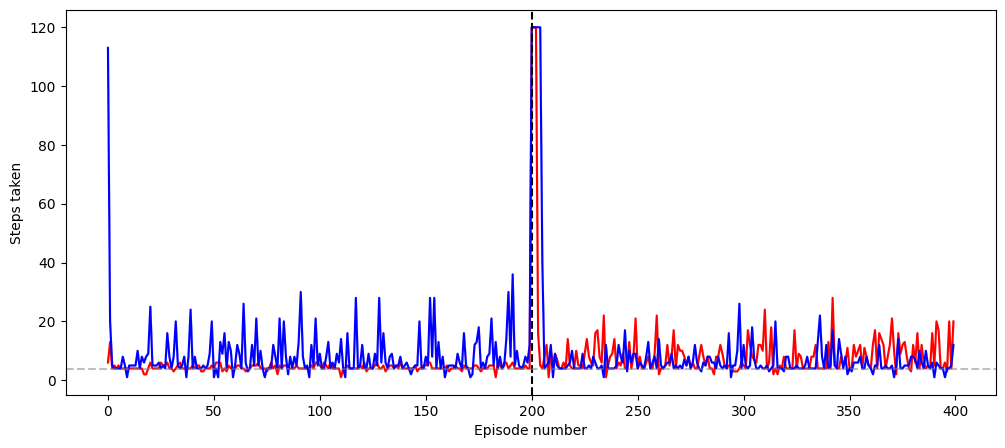

In [16]:
plot_path = os.path.join('plots','tdlearning')
suffices = ['tree_env']


leafs = [4,2,2]
env = create_circular_tree_graph(leafs)
steps_asym = []
if not os.path.exists(plot_path):
    os.makedirs(plot_path)

lower_bound = env.G.mean_distance()

steps_sym,steps_asym = load_generalization_data(path,suffices=suffices)
save_path = os.path.join(plot_path,'generalization_{}.png'.format('tree_env'))
fig,ax = create_generalization_plot(steps_sym,steps_asym,save_path = save_path,lower_bound=lower_bound)



### Experiments with same policy while training

In [12]:
n_repetitions = 120
num_steps = 120
num_episodes = 200
lr = 1e-1
gamma = 0.7


In [13]:




for env_name in env_list:
    steps_asym = []
    steps_sym = []


    
    grid_env = GridEnv(GridTemplate[env_name])
    
    env = GridEnvWrapper(grid_env)
    
    


    for i in range(n_repetitions):
        


        asym_agent = TDSR_WM(env.state_size, env.action_space.n, lr=lr, forward_weight=1.0,
                                                    backward_weight=0.0, gamma=gamma, poltype='softmax',
                                                    )
        sym_agent =  TDSR_WM(env.state_size, env.action_space.n, lr=lr, forward_weight=0.5,
                                                   backward_weight=0.5, gamma=gamma, poltype='softmax',
                                                   )
        
        lens_asym,lens_sym = run_copy_agent_generalization_experiment(env,asym_agent,sym_agent,num_steps=num_steps,num_episodes=num_episodes,normalize=False)

        
        steps_asym.append(lens_asym)
        
        steps_sym.append(lens_sym)
        
    steps_sym = np.array(steps_sym)
    steps_asym = np.array(steps_asym)
    suffices = [env_name,'same_policy']
    save_generalization_data((steps_sym,steps_asym),agents = ['symmetric','asymmetric'],path = path,suffices = suffices )



saved data at data/tdlearning/gen_steps_symmetric_empty_same_policy.npy
saved data at data/tdlearning/gen_steps_asymmetric_empty_same_policy.npy
saved data at data/tdlearning/gen_steps_symmetric_four_rooms_same_policy.npy
saved data at data/tdlearning/gen_steps_asymmetric_four_rooms_same_policy.npy
saved data at data/tdlearning/gen_steps_symmetric_t_maze_same_policy.npy
saved data at data/tdlearning/gen_steps_asymmetric_t_maze_same_policy.npy
saved data at data/tdlearning/gen_steps_symmetric_circle_same_policy.npy
saved data at data/tdlearning/gen_steps_asymmetric_circle_same_policy.npy
saved data at data/tdlearning/gen_steps_symmetric_detour_same_policy.npy
saved data at data/tdlearning/gen_steps_asymmetric_detour_same_policy.npy
saved data at data/tdlearning/gen_steps_symmetric_obstacle_same_policy.npy
saved data at data/tdlearning/gen_steps_asymmetric_obstacle_same_policy.npy


(100,)
(100,)
(100,)
(100,)


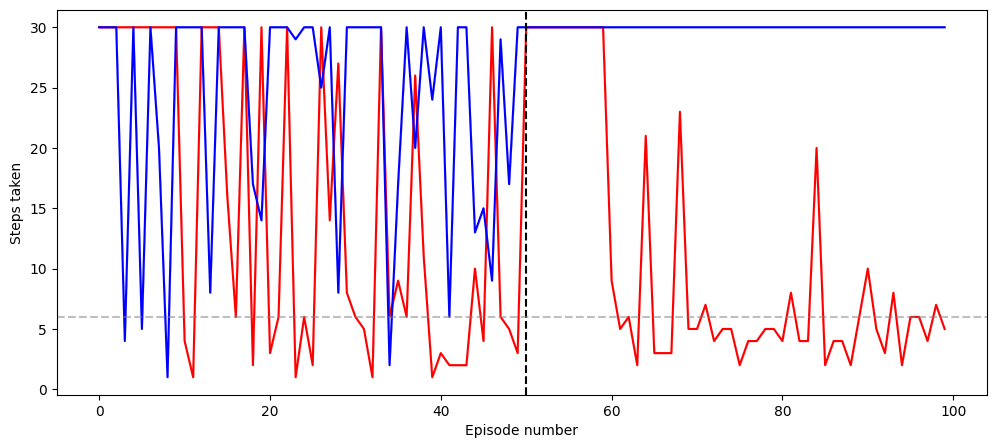

(100,)
(100,)
(100,)
(100,)


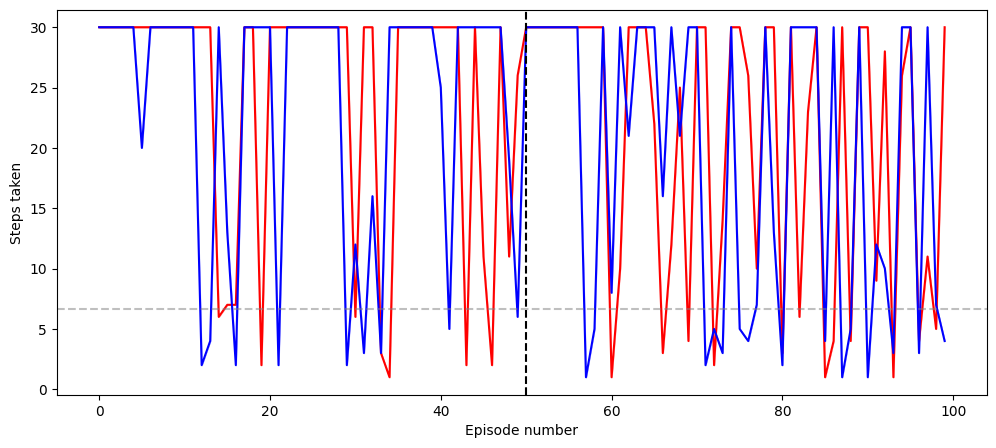

(100,)
(100,)
(100,)
(100,)


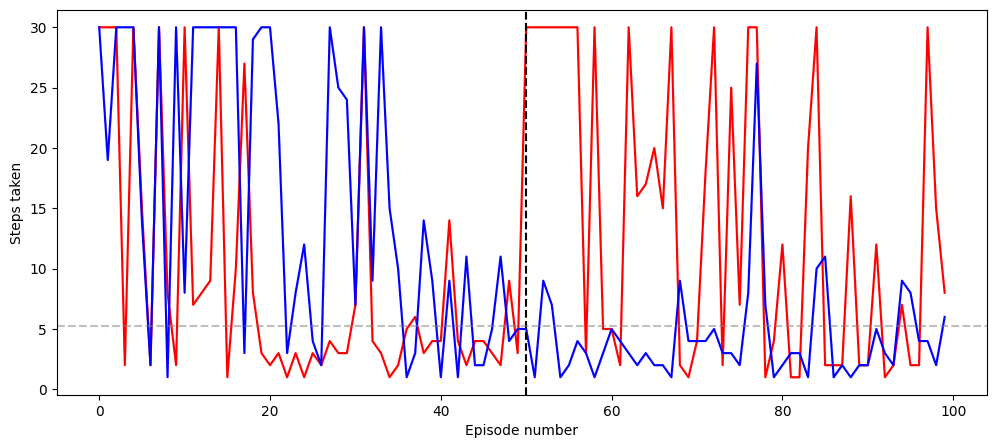

(100,)
(100,)
(100,)
(100,)


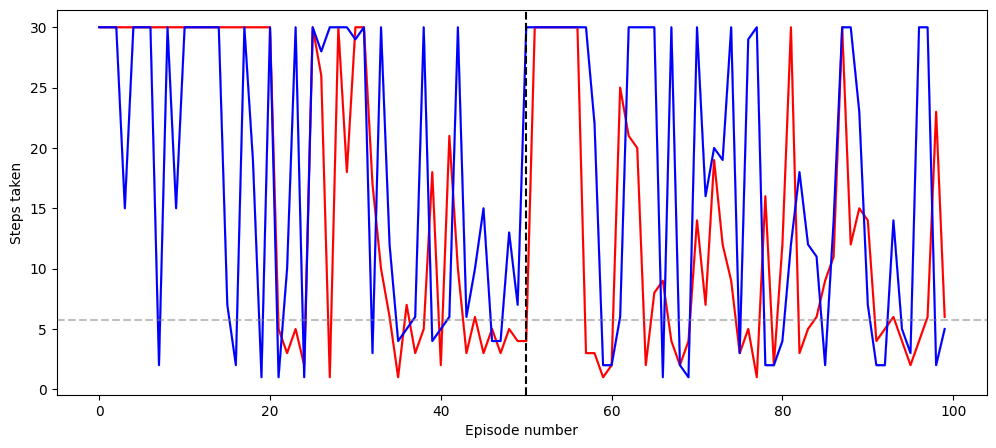

(100,)
(100,)
(100,)
(100,)


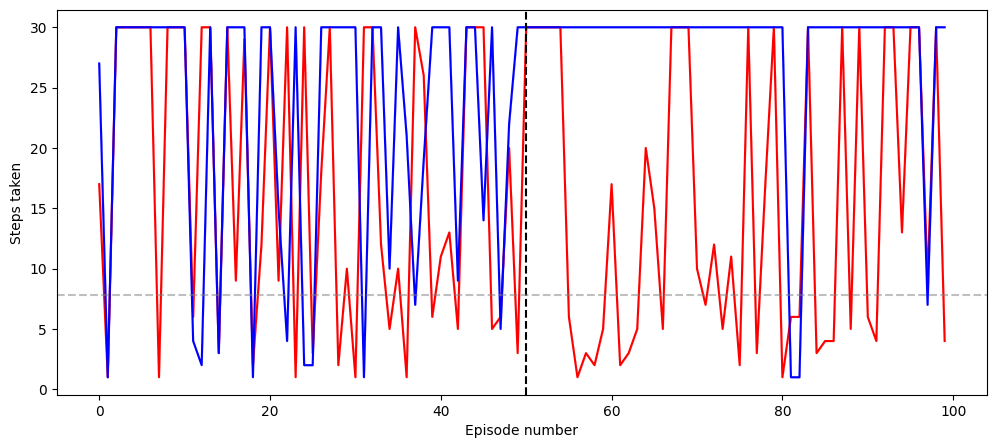

(100,)
(100,)
(100,)
(100,)


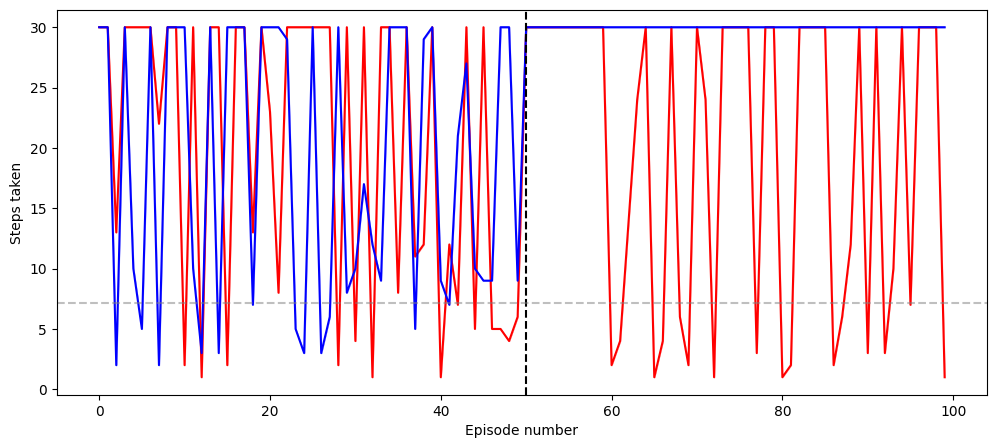

In [14]:
plot_path = os.path.join('plots','tdlearning')
if not os.path.exists(plot_path):
    os.makedirs(plot_path)
for env_name in env_list:
    suffices = [env_name]
    env = create_grid_env(env_name)

    
    lower_bound = env.G.mean_distance()
    
    steps_sym,steps_asym = load_generalization_data(path,suffices=suffices)
    
    save_path = os.path.join(plot_path,'generalization_{}_same_policy.png'.format(env_name))
    fig,ax = create_generalization_plot(steps_sym,steps_asym,save_path = save_path,lower_bound=lower_bound)
    
    plt.show()

### with normalization

In [15]:
n_repetitions = 120
num_steps = 120
num_episodes =200
lr = 1e-1
gamma = 0.7


In [16]:




for env_name in env_list:
    steps_asym = []
    steps_sym = []


    env = create_grid_env(env_name)

    


    for i in range(n_repetitions):
        


        asym_agent = TDSR_WM(env.state_size, env.action_space.n, lr=lr, forward_weight=1.0,
                                                    backward_weight=0.0, gamma=gamma, poltype='softmax',
                                                  )
        sym_agent =  TDSR_WM(env.state_size, env.action_space.n, lr=lr, forward_weight=0.5,
                                                   backward_weight=0.5, gamma=gamma, poltype='softmax',
                                                   )
        
        lens_asym,lens_sym = run_copy_agent_generalization_experiment(env,asym_agent,sym_agent,num_steps=num_steps,num_episodes=num_episodes,normalize=True)

        
        steps_asym.append(lens_asym)
        
        steps_sym.append(lens_sym)
        
    steps_sym = np.array(steps_sym)
    steps_asym = np.array(steps_asym)
    
    suffices = [env_name,'same_policy','normalized']
    save_generalization_data((steps_sym,steps_asym),agents = ['symmetric','asymmetric'],path = path,suffices = suffices )


saved data at data/tdlearning/gen_steps_symmetric_empty_same_policy_normalized.npy
saved data at data/tdlearning/gen_steps_asymmetric_empty_same_policy_normalized.npy
saved data at data/tdlearning/gen_steps_symmetric_four_rooms_same_policy_normalized.npy
saved data at data/tdlearning/gen_steps_asymmetric_four_rooms_same_policy_normalized.npy
saved data at data/tdlearning/gen_steps_symmetric_t_maze_same_policy_normalized.npy
saved data at data/tdlearning/gen_steps_asymmetric_t_maze_same_policy_normalized.npy
saved data at data/tdlearning/gen_steps_symmetric_circle_same_policy_normalized.npy
saved data at data/tdlearning/gen_steps_asymmetric_circle_same_policy_normalized.npy
saved data at data/tdlearning/gen_steps_symmetric_detour_same_policy_normalized.npy
saved data at data/tdlearning/gen_steps_asymmetric_detour_same_policy_normalized.npy
saved data at data/tdlearning/gen_steps_symmetric_obstacle_same_policy_normalized.npy
saved data at data/tdlearning/gen_steps_asymmetric_obstacle_sam

(100,)
(100,)
(100,)
(100,)


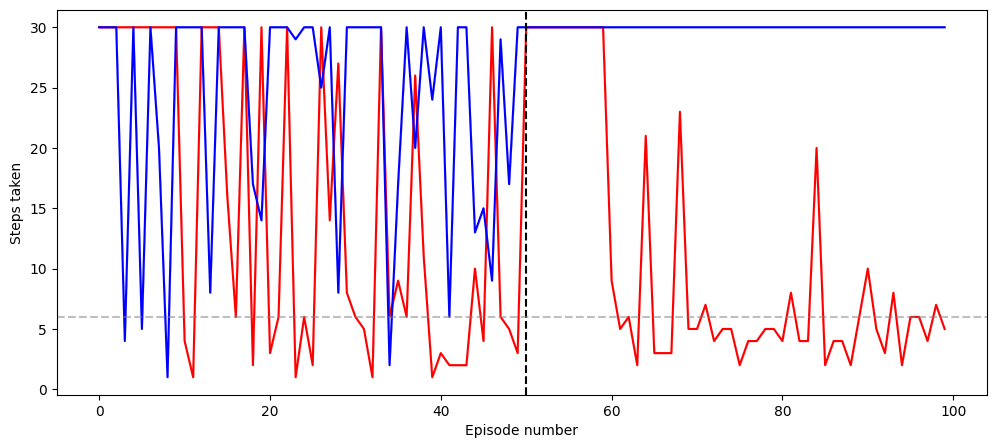

(100,)
(100,)
(100,)
(100,)


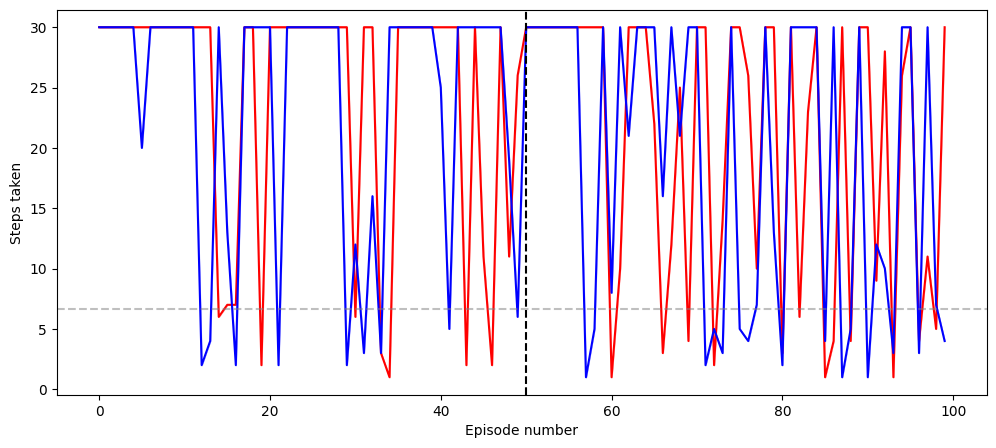

(100,)
(100,)
(100,)
(100,)


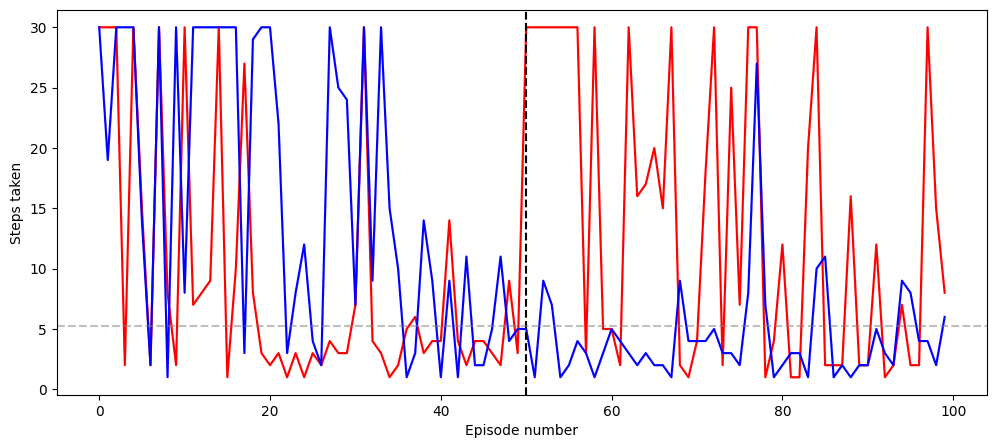

(100,)
(100,)
(100,)
(100,)


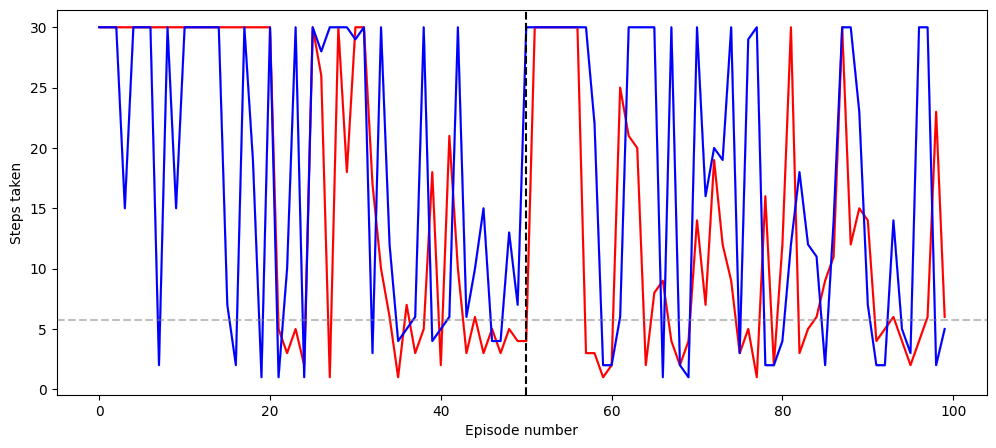

(100,)
(100,)
(100,)
(100,)


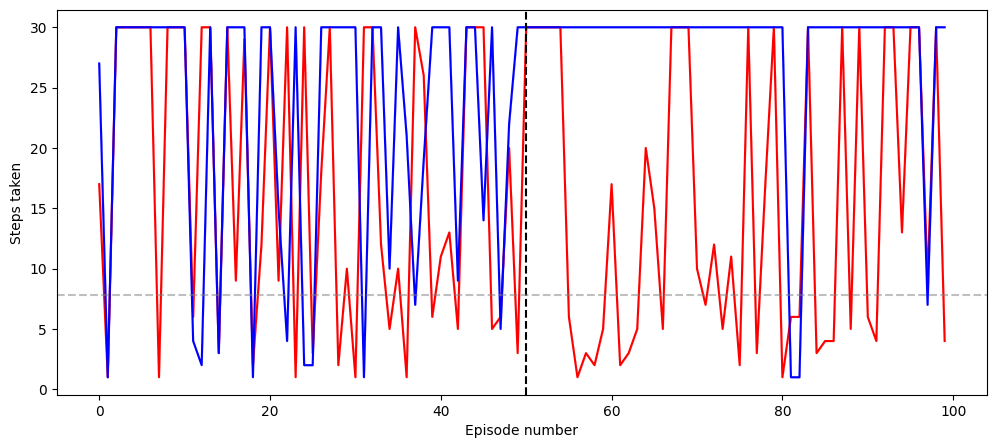

(100,)
(100,)
(100,)
(100,)


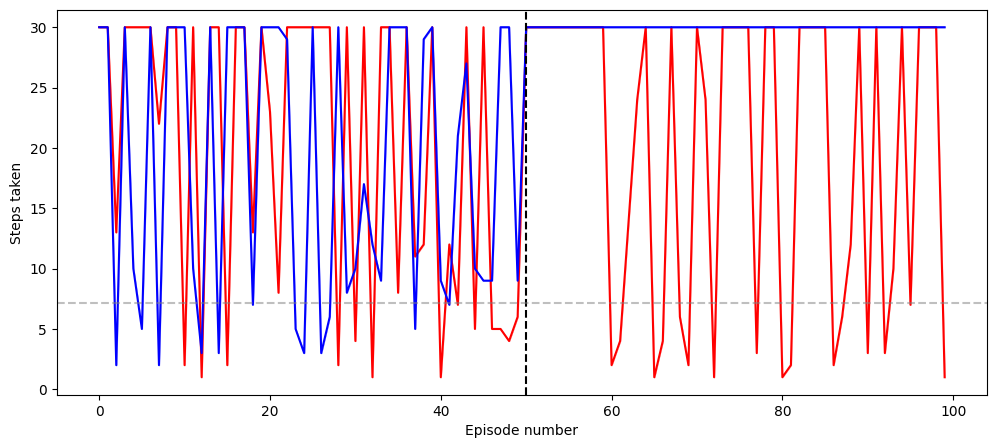

In [17]:
plot_path = os.path.join('plots','tdlearning')
if not os.path.exists(plot_path):
    os.makedirs(plot_path)
for env_name in env_list:
    suffices = [env_name]
    env = create_grid_env(env_name)

    lower_bound = env.G.mean_distance()
    
    steps_sym,steps_asym = load_generalization_data(path,suffices=suffices)
    
    save_path = os.path.join(plot_path,'generalization_{}_same_policy_normalized.png'.format(env_name))
    fig,ax = create_generalization_plot(steps_sym,steps_asym,save_path = save_path,lower_bound=lower_bound)
    
    plt.show()